# The Basics of Flight

A model in level flight has four basic forces at work: lift, weight, drag, and thrust. The total lift force must equal the weight of the model, and the total drag force must equal the thrust for the flight to remain level. Let's begin our study by looking at these forces.

## Lift and Drag Forces

The flying surfaces generate both lift and drag. The airfoil we select for many indoor models is just a simple for circular arc of some specified thickness, but it could be any shape you like. It certainly helps in our analysis if we have some test data for the chosen airfoil. That turned out to be more difficult than it should have been, due to the fact that not much research has been conducted on aircraft that fly as slow as our indoor models. Fortunately, I managed to dig up some usable data.

The movement of the airfoil through the air causes a pressure distribution to appear on the surface of each flying surface. There is also a shear force alo g the surface due to the friction between the air and that surface. If we integrate the pressure and shear distributions and combine them, we discover a single aerodynamic force vector that acts at a point along the surface chord we call the *center of pressure*. The vertical component of that force is called *lift* and the horizontal component is called *drag*. 

The *center of pressure* is an inconvenient place to deal with since it moves around with angle of attack. So, by convention, we apply that force at a different point we call the*aerodynamic center* which is commonly located at at the quarter chord point on the surface. Since this point is not at the center of pressure, applying a force there require that we add torque force to this picture. This will generate a moment about the real *center of pressure*, so we add in that *moment* (torque) to get the total forces acting on the surface.

In level flight, we want the forces to balance,meaning we need for the lift to equal the weight, and the thrust to equal the drag. 

The total lift is the sum of the lift generated by the wing and stabilizer.

\begin{equation}
W_m = L_w + L_s
\end{equation}

The total drag

\begin{equation}
D_t = T
\end{equation}

In addition, we must also make sure that the moments all sum to zero so the airplane remains level. We measure the moments by using the *center of gravity* as a reference point, since the weight is acting through that point. For that reason, we will calculate moments for all forces using the **cg** reference point.

Since the wing is usually mounted above the thrust line, and the stab is often not on that line either, we must include the moments caused by those forces acting at the final *aerodynamic center* points. Fortunately, we can just add in the moments caused by the flying surfaces, no matter where that are located. 

In the development below, we are assuming that the weight and thrust act through the **CG**, so they do not contribute to the moment calculations.

Here is a simple diagram showing the basic geometry we will be using:

In [1]:
%reload_ext tikzmagic

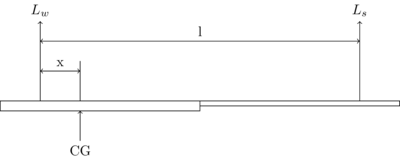

In [6]:

%%tikz
\draw (0,0) -- (5,0) -- (5,-0.25) -- (0,-0.25) -- cycle;
\draw (5,0) -- (10,0) -- (10,-0.125) -- (5,-0.125); 
\draw[->] (1,0) -- (1,2) node[above]{$L_w$};
\draw[->] (9,0) -- (9,2) node[above]{$L_s$};
\node[below] at (2,-1){CG};
\draw[->] (2,-1) -- (2,-0.25);
\draw[<->](1,1.5) -- node[above]{l}(9,1.5);
\draw[<->](1,0.75) -- node[above]{x} (2,0.75);
\draw (2,0) -- (2,1);

By convention a positive pitching moment results in a nose up condition. For that reason, the wing's moment will be positive, and the stab's will be negative. 

## Aerodynamic Coefficients

Airfoil data is usually presented using a set of non-dimensional *aerodynamic coefficients*. Here are the definitions of the coefficients we will use:

### Lift Coefficient

\begin{equation}
C_l = \frac{L}{q S}
\end{equation}

Where $L$L is the lift, $q$ is the dynamic pressure ($q = \frac{1}{2}\rho u^2$), and $S$ is the surface area.

### Drag Coefficient

\begin{equation}
C_d = \frac{D}{q S}
\end{equation}

Where $D$ is the drag force. and $c$

### Pitching Moment Coefficient

\begin{equation}
C_m = \frac{M}{q S c}
\end{equation}



From this point, we will use *Python* *SymPy* to help us with the derivations we need.

In [3]:
import sympy

In [45]:
L_w, S_w, C_w, C_lw, C_mw= sympy.symbols('L_w S_w C_w C_lw C_mw')
L_s, S_s, C_s, C_ls, C_ms = sympy.symbols('L_s S_s C_s C_ls C_ms')
q,l,x = sympy.symbols('q l x')

From of diagram, we can calculate the moments due to lift from the wing and stab:

In [46]:
M_w = L_w * x
M_s = - L_s * (l - x)

The moments for the wing and stab are:

In [49]:
M_pw = C_mw * q * S_w * C_w
M_ps = C_ms * q * S_s * C_s

Our equilibrium condition says that all of these moments must sum to zero. 

In [50]:
eq1 = M_w + M_s + M_pw + M_ps
eq1

C_ms*C_s*S_s*q + C_mw*C_w*S_w*q - L_s*(l - x) + L_w*x

We need to use the lift coefficient definitions to eliminate the lift terms here:

In [57]:
eq2 = eq1.subs(L_w, C_lw * q * S_w)
eq3 = eq2.subs(L_s, C_ls * q *S_s)
eq3

-C_ls*S_s*q*(l - x) + C_lw*S_w*q*x + C_ms*C_s*S_s*q + C_mw*C_w*S_w*q

McLean assumed a lift coefficient of 1 for the wing, and used this equation to calculate the lift coefficient for the stab. Let's solve this expression for the stab lift coefficient:

In [58]:
eq4 = sympy.solve(eq3, C_ls)
eq5 = eq4[0]
eq5

(C_lw*S_w*x + C_ms*C_s*S_s + C_mw*C_w*S_w)/(S_s*(l - x))

```{note}
The *SymPy* solver returns a list of expressions, so we index that list here
```

Does this match McLean's equation?

In [59]:
eq6 = (- x/C_w + C_mw + C_ms * S_s * C_s/(S_w*C_w))/((1 + x/l)*S_s * l /(S_w*C_w))
eq6

C_w*S_w*(C_ms*C_s*S_s/(C_w*S_w) + C_mw - x/C_w)/(S_s*l*(1 + x/l))

That does not look the same, can *SymPy* help?

In [60]:
eq7 = eq5.expand()
eq7

C_lw*S_w*x/(S_s*l - S_s*x) + C_ms*C_s*S_s/(S_s*l - S_s*x) + C_mw*C_w*S_w/(S_s*l - S_s*x)

In [62]:
eq8 = eq6.expand()
eq8

C_ms*C_s*S_s/(S_s*l + S_s*x) + C_mw*C_w*S_w/(S_s*l + S_s*x) - S_w*x/(S_s*l + S_s*x)

Now we see a problem, the signs in the denominator of these terms are different. Why?

Let's check our formula if the pitching moments are both zero. That means the moment from the wing lift must equal the moment from the tail lift.

First, we eliminate the moment coefficient terms:

In [68]:
eq9 = eq5.subs(C_mw,0)
eq10 = eq9.subs(C_ms,0)
eq10

C_lw*S_w*x/(S_s*(l - x))

Our equilibrium equation is now:

In [71]:
eq11 = C_lw * q * S_w* x - eq10 * q * S_s * (l-x)
eq11

0

This is what we want to see. The expression and development we worked through look to be correct!

Let's try the same idea using the equation in the paper:

In [74]:
eq12 = eq6.subs(C_mw,0)
eq13 = eq12.subs(C_ms,0)
eq13.expand()

-S_w*x/(S_s*l + S_s*x)

Clearly, this will not work when we try our equilibrium expression. I am going to let this go as a typo in McLean's report.

In [76]:
eq14 = C_lw * q * S_w* x - eq13 * q * S_s * (l-x)
eq14

C_lw*S_w*q*x + S_w*q*x*(l - x)/(l*(1 + x/l))

In [ ]:
Definitely not zero!

## Total Lift Coefficient

The total lift is the sum of the ift from the wing and tail. Tus the total lift coefficient is just the sum of the wing and stab lift coefficients:

In [79]:
C_ltotal = C_lw + eq5
C_ltotal

C_lw + (C_lw*S_w*x + C_ms*C_s*S_s + C_mw*C_w*S_w)/(S_s*(l - x))

From McLean's equation we get this:

In [ ]:
M_Ltotal = C_lw + 

- $C_{lf} = 1.0$ - wing lift coefficient
- $C_{mf} = -0.10$ - wing pitching moment
- $C_{mr} = -0.05$ - stab pitching moment
- $S_f = 30.0$ - wing area rule limit for A6 class
- $S_r = 15.0$ - stab surface area (~50%)
- $b_f = 15.5$ - projected span (TODO fix this)
- $C_f = 1.94$ - mean aerodynamic chord of wing ($S_f / b_f$)